In [1]:
from bs4 import BeautifulSoup
import re

# Function to extract data from an HTML file
def extract_data_from_html(file_path, year):
    # Open and read the HTML file
    with open(file_path, 'r', encoding='utf-8') as file:
        html = file.read()
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    
    # Find all relevant elements containing the data
    items = soup.find_all("h4", {"class": "md:whitespace-nowrap md:text-ellipsis md:overflow-hidden font-bold md:font-normal"})
    categories = soup.find_all("span", {"class": "text-ellipsis overflow-hidden w-full"})
    suburbs = soup.find_all("span", {"class": "text-ellipsis overflow-hidden"})
    amounts = soup.find_all("span", {"class": "mt-4 md:mt-0 inline-flex float-right gap-2 justify-end font-mono font-semibold text-md md:text-sm"})
    
    # Initialize a list to hold the extracted data
    data = []
    
    # Loop through each item and extract the relevant information
    for i in range(len(items)):
        item = items[i].text
        category = categories[i].text
        suburb = suburbs[i].text
        amount = amounts[i].text
        
        # Clean and convert the amount to a float
        amount = re.sub(r'[^\d,]', '', amount).replace(',', '.')  # Remove non-digits and replace comma with dot
        amount = float(amount)
        
        # Append the extracted information as a list to the data list
        data.append([item, category, suburb, amount, year])
    
    return data

# Extract data from each HTML file for the given years
data_2022 = extract_data_from_html('Visualisierung_Berliner_Haushaltsdaten_2022.html', 2022)
data_2023 = extract_data_from_html('Visualisierung_Berliner_Haushaltsdaten_2023.html', 2023)
data_2024 = extract_data_from_html('Visualisierung_Berliner_Haushaltsdaten_2024.html', 2024)

# Combine all extracted data into a single list
combined_data = data_2022 + data_2023 + data_2024

# Define the output file path
output_file = 'berliner_haushaltsdaten_combined.txt'

# Write the combined data to the output file
with open(output_file, 'w', encoding='utf-8') as f:
    for entry in combined_data:
        f.write(f"{entry[0]} / {entry[1]} / {entry[2]} / {entry[3]} / {entry[4]}\n")

print(f"Combined data has been written to '{output_file}'.")


Combined data has been written to 'berliner_haushaltsdaten_combined.txt'.


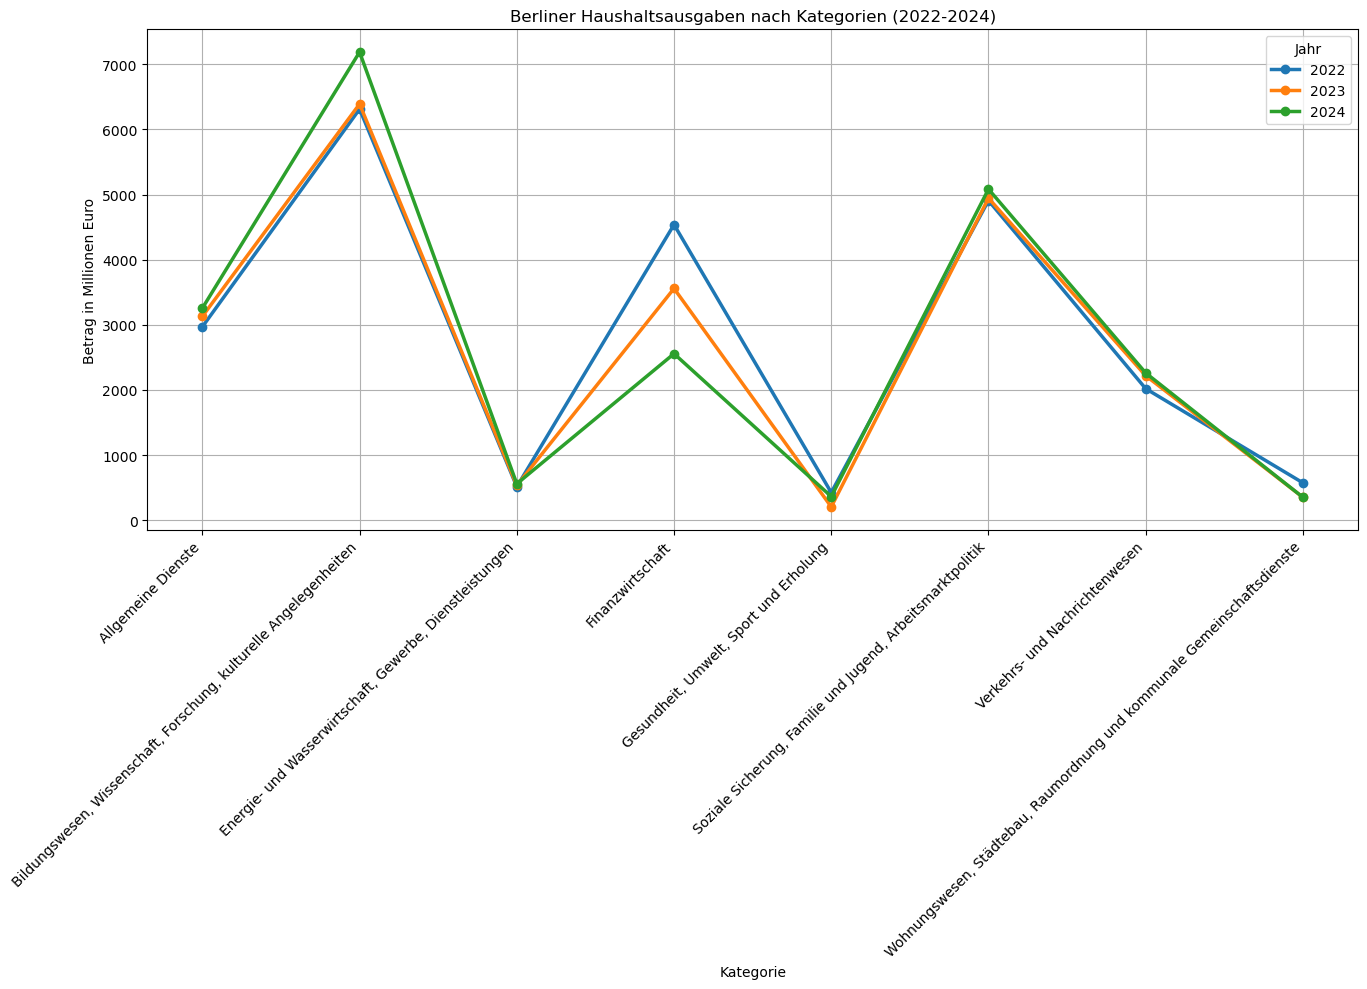

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the input text file
input_file = 'berliner_haushaltsdaten_combined.txt'

# Define column names for the DataFrame
columns = ['Item', 'Category', 'Suburb', 'Amount', 'Year']

# Read the data from the text file into a DataFrame
# Using ' / ' as the delimiter and specifying no header in the input file
df = pd.read_csv(input_file, sep=' / ', header=None, names=columns, engine='python')

# Create a pivot table for visualization
# Index is 'Category', columns are 'Year', values are 'Amount', and we aggregate by summing the amounts
pivot_df = df.pivot_table(index='Category', columns='Year', values='Amount', aggfunc='sum')

# Convert amounts to millions of euros for better readability
pivot_df = pivot_df / 1_000_000  # Conversion to millions of euros

# Set the size of the plot for better readability
plt.figure(figsize=(14, 10))

# Plot the data as lines with markers
# Use 'line' kind for the plot, add markers to each data point, and set line width
pivot_df.plot(kind='line', marker='o', ax=plt.gca(), linewidth=2.5)

# Set the title of the plot
plt.title('Berliner Haushaltsausgaben nach Kategorien (2022-2024)')

# Set the labels for the x and y axes
plt.xlabel('Kategorie')
plt.ylabel('Betrag in Millionen Euro')

# Add a legend with the title 'Jahr' and place it in the upper right corner
plt.legend(title='Jahr', loc='upper right')

# Add grid lines to the plot for better readability
plt.grid(True)

# Set the x-ticks rotation and horizontal alignment, as well as font size for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set the font size for y-ticks
plt.yticks(fontsize=10)

# Adjust the layout to make sure everything fits well
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('ausgaben_nach_kategorien_Liniendiagramm_2022_2024.png')

# Display the plot
plt.show()


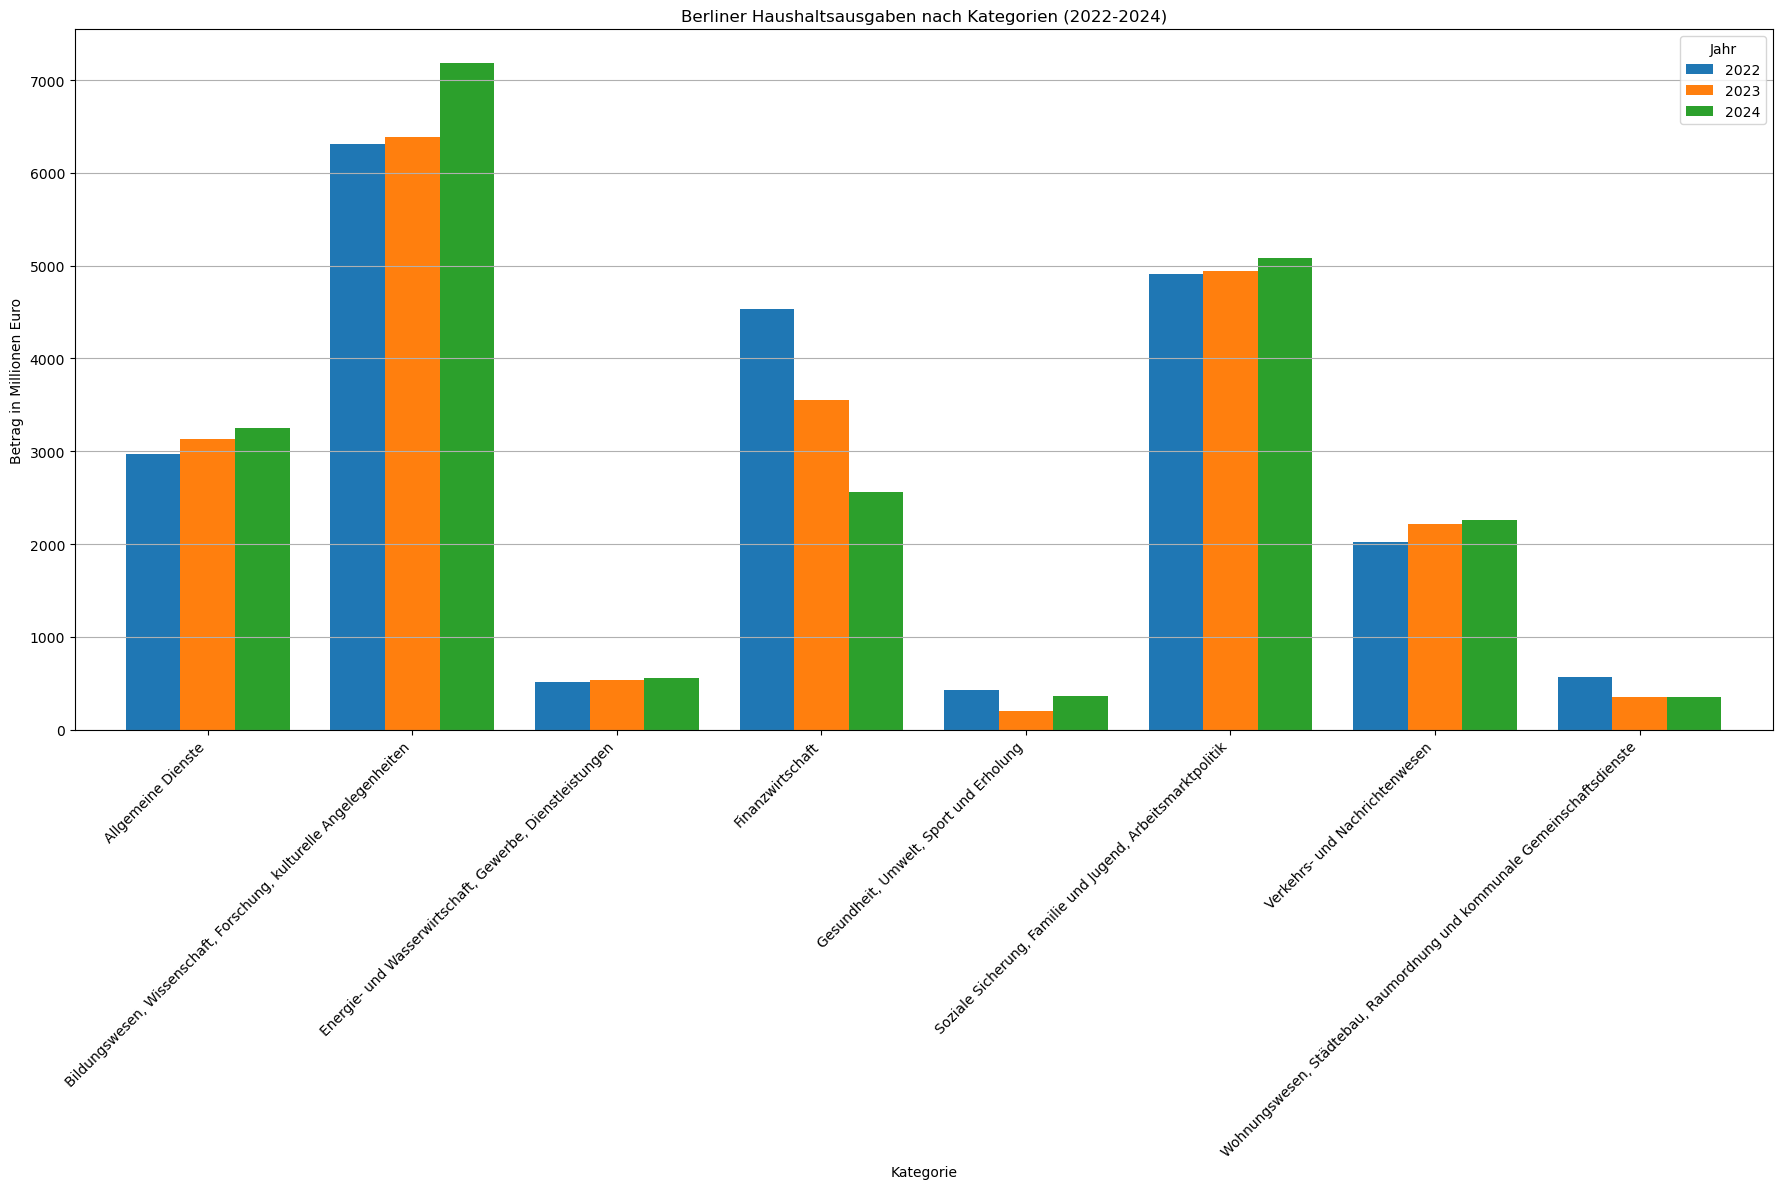

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten aus der Textdatei einlesen
input_file = 'berliner_haushaltsdaten_combined.txt'

# Spaltennamen für DataFrame
columns = ['Item', 'Category', 'Suburb', 'Amount', 'Year']

# DataFrame aus der Textdatei erstellen
df = pd.read_csv(input_file, sep=' / ', header=None, names=columns, engine='python')

# Pivot-Tabelle für die Visualisierung erstellen
pivot_df = df.pivot_table(index='Category', columns='Year', values='Amount', aggfunc='sum')

# Umrechnung der Beträge in Milliarden Euro
pivot_df = pivot_df / 1_000_000  # Umrechnung in Millionen Euro

# Plotting als Balkendiagramm
plt.figure(figsize=(18, 12))  # Erhöhen der Figure-Größe für bessere Lesbarkeit

# Balkendiagramm erstellen
pivot_df.plot(kind='bar', ax=plt.gca(), width=0.8)

plt.title('Berliner Haushaltsausgaben nach Kategorien (2022-2024)')
plt.xlabel('Kategorie')
plt.ylabel('Betrag in Millionen Euro')
plt.legend(title='Jahr', loc='upper right')  # Legende oben rechts

plt.grid(axis='y')  # Gitterlinien nur auf der Y-Achse anzeigen
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation und Schriftgröße der x-Achsenlabels
plt.yticks(fontsize=10)  # Schriftgröße der y-Achsenlabels

plt.tight_layout()

plt.savefig('ausgaben_nach_kategorien_Balkendiagramm_2022_2024.png')
plt.show()


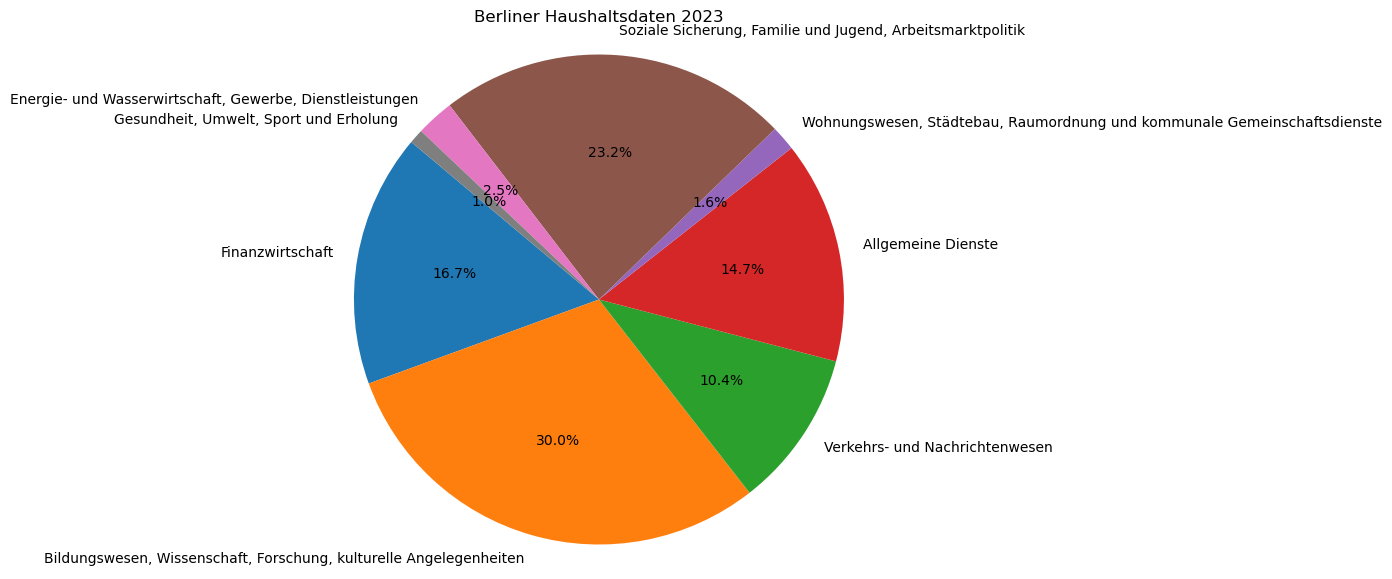

In [5]:
import matplotlib.pyplot as plt

# Function to read the combined data from the file
def read_combined_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' / ')
            item, category, suburb, amount, year = parts[0], parts[1], parts[2], float(parts[3]), int(parts[4])
            data.append([item, category, suburb, amount, year])
    return data

# Function to aggregate the amounts by category for a specific year
def aggregate_by_category(data, year):
    category_totals = {}
    for entry in data:
        if entry[4] == year:
            category = entry[1]
            amount = entry[3]
            if category in category_totals:
                category_totals[category] += amount
            else:
                category_totals[category] = amount
    return category_totals

# Function to generate and display the pie chart
def create_pie_chart(category_totals, year):
    labels = category_totals.keys()
    sizes = category_totals.values()

    plt.figure(figsize=(10, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Berliner Haushaltsdaten {year}')
    plt.savefig('ausgaben_nach_kategorien_Kreisdiagramm_2023.png')
    plt.show()

# Define the file path of the combined data
combined_data_file = 'berliner_haushaltsdaten_combined.txt'

# Read the combined data
combined_data = read_combined_data(combined_data_file)

# Specify the year for which you want to visualize the data
year_to_visualize = 2023

# Aggregate the amounts by category for the specified year
category_totals = aggregate_by_category(combined_data, year_to_visualize)

# Create and display the pie chart
create_pie_chart(category_totals, year_to_visualize)
